In [1]:
import datetime

In [2]:
import nltk
import string

In [3]:
import pickle

In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [8]:
from collections import Counter

In [9]:
from imblearn.under_sampling import RandomUnderSampler

In [10]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [11]:
# function to vectorize the type_of_material series into a y target vector.

def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [12]:
#rate of correct predictions out of total predictions

def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')
    print(f'tn:{tn} fp:{fp} fn:{fn} tp:{tp}')

In [13]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    for char in string:
        if char in string.punctuation:
            string = string.replace(char, "")
            
    return string

In [14]:
%%time
#import csv

data = pd.read_csv('data/raw_19.csv', index_col=0, low_memory=False)

CPU times: user 2.57 s, sys: 465 ms, total: 3.04 s
Wall time: 3.05 s


In [15]:
%%time
_2019_df = data.copy()

CPU times: user 8.07 ms, sys: 1.98 ms, total: 10.1 ms
Wall time: 10 ms


In [16]:
_2019_df.shape

(41748, 21)

In [17]:
_2019_df.text[0]

"['Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. ', 'In his essay “The Crack-Up,” F. Scott Fitzgerald wrote, “The test of a first-rate intelligence is the ability to hold two opposed ideas in the mind at the same time, and still retain the ability to function.”', 'On New Year’s Day 1919, the headlines in The New York Times gave a hint of how difficult that would be for Americans, struggling to live up to the shimmering promises they had made to the world during the Great War, which had ended just over a month before.', 'Poles, newly independent but already threatened by their neighbors, were calling on Americans to protect them. Other countries, like Ireland, were on the cusp of independence, but asking for help. A bewildering set of new responsibilities was settling upon a country that had long cherished its freedom from the Old World.', 'Overwhelmingly, Americans lo

In [18]:
(_2019_df.iloc[0])

abstract            From the Treaty of Versailles to Prohibition, ...
web_url             https://www.nytimes.com/2018/12/31/opinion/191...
snippet             From the Treaty of Versailles to Prohibition, ...
lead_paragraph      Throughout 2019, The New York Times Opinion se...
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': '1919: The Year of the Crack-Up', 'ki...
keywords            [{'name': 'subject', 'value': 'United States P...
pub_date                                     2019-01-01T00:00:03+0000
document_type                                                 article
news_desk                                                        OpEd
section_name                                                  Opinion
byline              {'original': 'By Ted Widmer', 'person': [{'fir...
type_of_material                                                Op-Ed
_id                 

In [19]:
text_nan = _2019_df.text.isna()

In [20]:
sum(text_nan)

0

In [21]:
len(text_nan)

41748

In [22]:
(_2019_df.iloc[0])

abstract            From the Treaty of Versailles to Prohibition, ...
web_url             https://www.nytimes.com/2018/12/31/opinion/191...
snippet             From the Treaty of Versailles to Prohibition, ...
lead_paragraph      Throughout 2019, The New York Times Opinion se...
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': '1919: The Year of the Crack-Up', 'ki...
keywords            [{'name': 'subject', 'value': 'United States P...
pub_date                                     2019-01-01T00:00:03+0000
document_type                                                 article
news_desk                                                        OpEd
section_name                                                  Opinion
byline              {'original': 'By Ted Widmer', 'person': [{'fir...
type_of_material                                                Op-Ed
_id                 

In [23]:
_2019_df.shape

(41748, 21)

In [24]:
drop_nan_2019_df = _2019_df[text_nan == False]

In [25]:
drop_nan_2019_df.shape

(41748, 21)

In [26]:
# sum(drop_nan_2019_df.type_of_material == "News")

# 1741

In [27]:
# sum(drop_nan_2019_df.type_of_material == "Op-Ed")

# 31

In [28]:
(drop_nan_2019_df.iloc[0])

abstract            From the Treaty of Versailles to Prohibition, ...
web_url             https://www.nytimes.com/2018/12/31/opinion/191...
snippet             From the Treaty of Versailles to Prohibition, ...
lead_paragraph      Throughout 2019, The New York Times Opinion se...
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': '1919: The Year of the Crack-Up', 'ki...
keywords            [{'name': 'subject', 'value': 'United States P...
pub_date                                     2019-01-01T00:00:03+0000
document_type                                                 article
news_desk                                                        OpEd
section_name                                                  Opinion
byline              {'original': 'By Ted Widmer', 'person': [{'fir...
type_of_material                                                Op-Ed
_id                 

In [29]:
sum(drop_nan_2019_df.type_of_material == "News")

37609

In [30]:
sum(drop_nan_2019_df.type_of_material == "Op-Ed")

4139

In [31]:
_2019_df = drop_nan_2019_df

In [32]:
_2019_df.shape

(41748, 21)

In [33]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

In [34]:
#turn series into list...

corpus = list(X)

In [42]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [43]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_y_ser(y)

CPU times: user 11.6 ms, sys: 1.01 ms, total: 12.6 ms
Wall time: 12.1 ms


In [44]:
y.value_counts()

0    37609
1     4139
Name: type_of_material, dtype: int64

In [45]:
y.shape

(41748,)

# remove stop words

# stemming/lemmatization

In [46]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [47]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs


In [48]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [49]:
test_token = snowball_tokenize(corpus[0])

# vectorizer

# SNOWBALL tfidf

In [50]:
# %%time
# #create vectorizer

# snow_vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents='ascii', 
#                  lowercase=True, 
# #                 preprocessor=None, 
#                  tokenizer=snowball_tokenize, 
# #                 analyzer='word', 
#                  stop_words='english', 
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(1, 1), 
#                  max_df=0.90, 
#                  min_df=0.10, 
#                  max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )

In [51]:
# %%time
# print(datetime.datetime.now())

# X_snowball = snow_vectorizer.fit_transform(corpus)
# # UserWarning: Your stop_words may be inconsistent with your preprocessing. 

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

<!-- /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent)) -->

# WORDNET tfidf

In [54]:
%%time
#create vectorizer

wordnet_vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                 stop_words='english', 
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(1, 2), 
                 max_df=0.90, 
                 min_df=0.10, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 47.9 µs


# test, train, split

In [55]:
#test, train, split

In [58]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# (100935, 563) (33645, 563) (100935,) (33645,)
# CPU times: user 65.7 ms, sys: 16.5 ms, total: 82.2 ms
# Wall time: 81.8 ms

(31311,) (10437,) (31311,) (10437,)
CPU times: user 7.84 ms, sys: 1.46 ms, total: 9.29 ms
Wall time: 8.07 ms


In [59]:
%%time
print(datetime.datetime.now())

X_train =  wordnet_vectorizer.fit_transform(X_train)

2020-12-14 22:38:23.782631


/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 5min 44s, sys: 2.44 s, total: 5min 47s
Wall time: 5min 48s


In [60]:
%%time
print(datetime.datetime.now())

X_test = wordnet_vectorizer.transform(X_test)

2020-12-14 22:44:42.098649
CPU times: user 1min 51s, sys: 736 ms, total: 1min 52s
Wall time: 1min 52s


In [134]:


# X_worknet = .fit_transform(corpus)
# # UserWarning: Your stop_words may be inconsistent with your preprocessing. 

# # 2020-12-07 11:35:33.112598
# # /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
# #   'stop_words.' % sorted(inconsistent))
# # CPU times: user 29min 34s, sys: 22 s, total: 29min 56s
# # Wall time: 30min 24s

2020-12-13 12:02:25.992859
CPU times: user 7min 48s, sys: 2.98 s, total: 7min 51s
Wall time: 7min 53s


In [62]:
X_train.shape

(31311, 726)

In [63]:
X_test.shape

(10437, 726)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

# count vectorizer

In [64]:
# count_vectorizer = CountVectorizer(strip_accents='None',
#                                    lowercase=True,
#                                    tokenizer=snowball_tokenize,
#                                    stop_words='english',
#                                    max_features=None)

# balance classes

In [65]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 3137), (1, 3137)]
RandomUnderSampler(random_state=0)
CPU times: user 31.6 ms, sys: 3.16 ms, total: 34.8 ms
Wall time: 36.8 ms


# random forest classifier

In [66]:
%%time
print(datetime.datetime.now())
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_resampled, y_resampled)
y_pred = rf_clf.predict(X_test)

2020-12-14 22:47:24.117233
CPU times: user 768 ms, sys: 15.5 ms, total: 784 ms
Wall time: 789 ms


In [67]:
y_pred.shape

(10437,)

### metrics y_pred

In [68]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [69]:
print(y_test.shape)
print(y_pred.shape)

(10437,)
(10437,)


In [70]:
metrics_(tn, fp, fn, tp)

accuracy = 0.7474370029702022
recall = 0.9051896207584831
precision = 0.2630510440835267
tn:6894 fp:2541 fn:95 tp:907


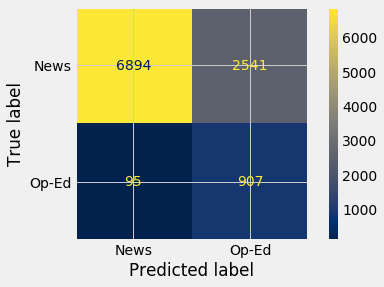

In [71]:
class_names = ["News", "Op-Ed"]

plot_confusion_matrix(estimator=rf_clf,
                      X=X_test,
                      y_true=y_test, 
                      display_labels=class_names,
                     cmap='cividis')

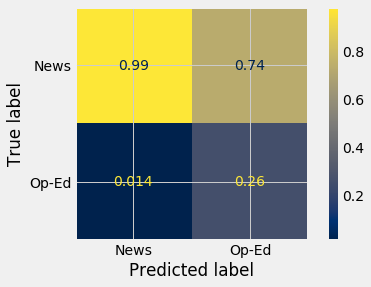

In [72]:
class_names = ["News","Op-Ed"]

plot_confusion_matrix(estimator=rf_clf,
                      X=X_test,
                      y_true=y_test, 
                      display_labels=class_names,
                      normalize='pred',
                      cmap='cividis')

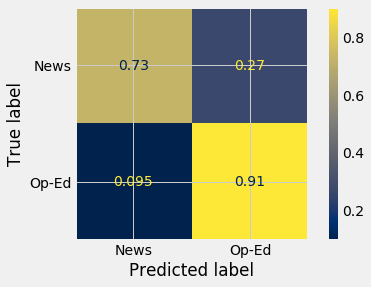

In [73]:
class_names = ["News","Op-Ed"]

plot_confusion_matrix(estimator=rf_clf,
                      X=X_test,
                      y_true=y_test, 
                      display_labels=class_names,
                      normalize='true',
                     cmap='cividis')

# important features

In [74]:
feat_names = wordnet_vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

In [75]:
len(feat_names)

726

### permutation importance

In [76]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        
#what does importances_mean and importances_std mean?

#these scores would make up my model.score()?

#ngram_range=(1, 2), where are my n grams?!?!?

2020-12-14 22:47:40.228614
political0.008 +/- 0.001
country 0.007 +/- 0.001
government0.006 +/- 0.001
policy  0.005 +/- 0.001
american0.005 +/- 0.001
people  0.004 +/- 0.001
?       0.004 +/- 0.001
power   0.004 +/- 0.001
. ,     0.003 +/- 0.001
election0.002 +/- 0.001
reason  0.002 +/- 0.001
politics0.002 +/- 0.000
way     0.002 +/- 0.001
america 0.002 +/- 0.001
)       0.002 +/- 0.001
isnt    0.002 +/- 0.000
, 'but  0.002 +/- 0.000
republican0.002 +/- 0.000
support 0.001 +/- 0.000
mean    0.001 +/- 0.001
president0.001 +/- 0.001
trump   0.001 +/- 0.001
season  0.001 +/- 0.001
party   0.001 +/- 0.000
instead 0.001 +/- 0.000
act     0.001 +/- 0.000
campaign0.001 +/- 0.000
problem 0.001 +/- 0.000
simply  0.001 +/- 0.000
majority0.001 +/- 0.000
care    0.000 +/- 0.000
turn    0.000 +/- 0.000
let     0.000 +/- 0.000
CPU times: user 24min 21s, sys: 53.5 s, total: 25min 15s
Wall time: 25min 23s


### plot

2020-12-14 23:13:04.167095
CPU times: user 334 ms, sys: 16.6 ms, total: 351 ms
Wall time: 362 ms


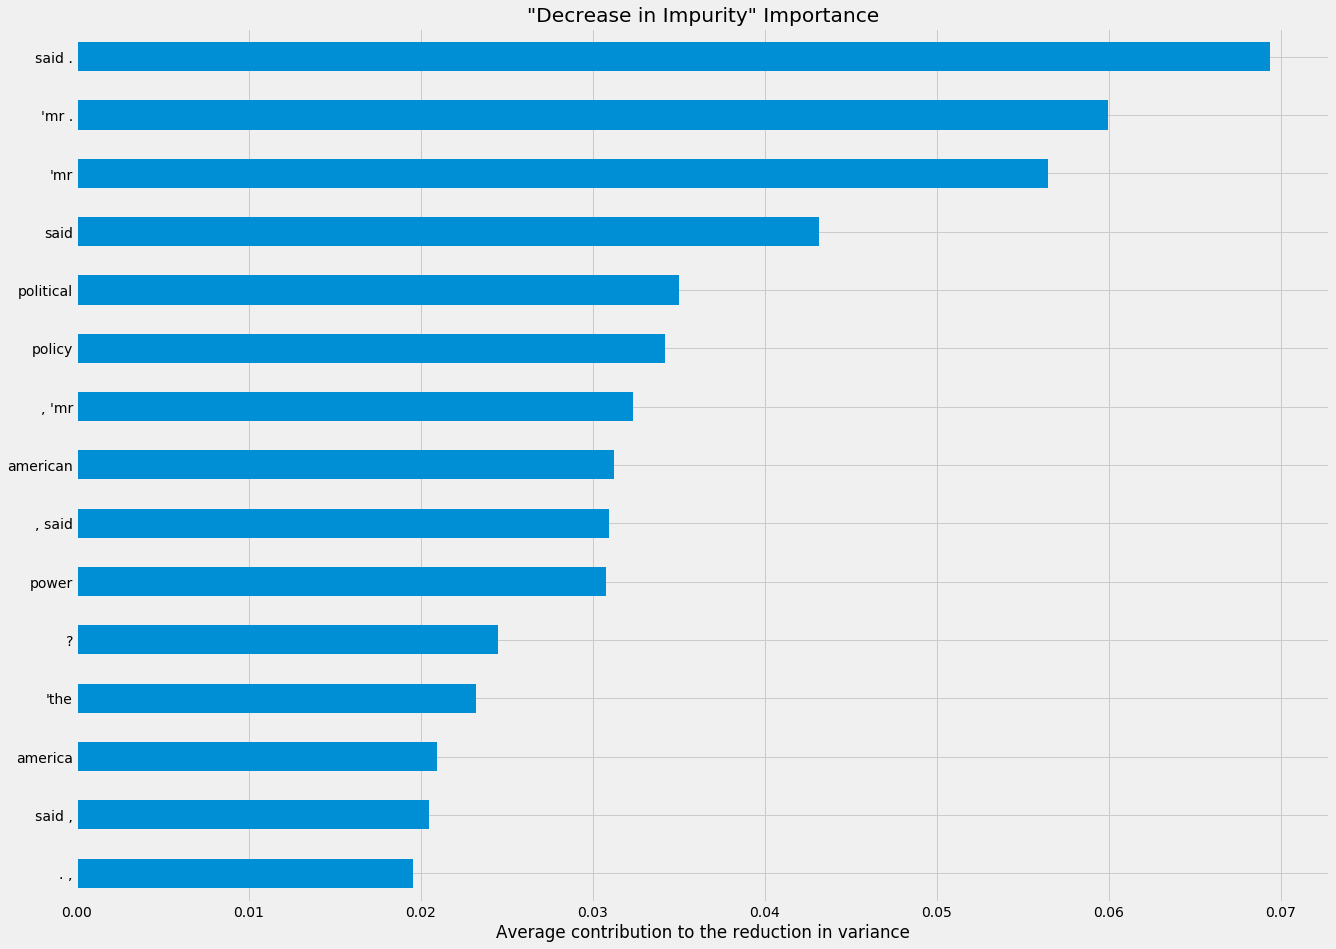

In [77]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-15:].plot(kind='barh', figsize=(20,15))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance')
plt.savefig('important_feat_bar');

# save model as pickle file

In [78]:
filename = 'data/rf_clf.pkl'
# X_test = 'data/x'
# Y_test = 'data/y'

In [79]:
pickle.dump(rf_clf, open(filename, 'wb'))

In [80]:
loaded_model = pickle.load(open(filename, 'rb'))

In [81]:
#loaded_model.fit(X_resampled, y_resampled)

In [82]:
result = loaded_model.score(X_resampled, y_resampled)

In [83]:
type(result

SyntaxError: unexpected EOF while parsing (<ipython-input-83-d49a59a80d4f>, line 1)